<a href="https://colab.research.google.com/github/celiosantana/0001---Linear-Regression---Shipping-Price---Python-/blob/main/1_RegressaoLinear_precoFrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Linear**
Prof: Célio Santana

# 📌 Nossos objetivos
> - Compreender os tópicos básicos de Regressão Linear (Pre-Processamento Treinamento, Utilização).
> - Uso do Skalearn (linearReegression) para a realização da Regressão Linear.

# 📚O que é Sci Kit Learn?
> - Sci Kit Learn (SKLearn) é uma biblioteca de machine learning utilizada para vários problemas de Ciência de Dados. Ela possui código aberto e é projetada para lidar com diversas de maneira eficaz com a implementação mais eficiente do que algoritmos comuns
> - Para muitas tarefas de ML, a SKLearn possui apenas um método de implementação, escolhendo o algoritmo mais eficiente disponível atualmente. Isso significa que muitas vezes você não tem a opção de escolher outros algoritmos.

# 📝 O Problema
> Inicialmente temos apenas um dataset contendo a região da entrega, o preço pago e a quantidade de dias que durou a entrega. O conjunto de dados original é o dataSet original regiao_frete_dias.csV

#Iniciando a preparação dos dados


---



##Importando as Bibliotecas


In [159]:
import pandas as pd   #Biblioteca para o tratamento do CSV
import plotly.express as px     #Biblioteca para apresentar gráficos
import seaborn as sns    #Biblioteca para visualização de dados
import numpy as np     #Biblioteca para trabalhar com funções matemáticas e arrays
import sklearn as sk
import plotly as plt
import scipy as sp
import matplotlib as plt3
from sklearn.metrics import mean_absolute_error, mean_squared_error   #Funções que calculam a margem de erro (absoluta e qa=uadrática) da regressão linear
from sklearn.linear_model import LinearRegression #Importando a Regressão Linear
from scipy.stats import shapiro #Importando o teste de normalidade shapiro Wilk
from scipy.stats import kstest #Importando o teste de normalidade Kolgomorov Smirnov
from pandas.api.types import is_numeric_dtype #Importando a verificação do Pandas para determinar se uma coluna é ou não numérica
import matplotlib.pyplot as plt2 #Importanto o pyplot para visualização de dados do gráfico de calor


## Verificando as versões das bibliotecas utilizadas

In [160]:
print(f''' Verificando versões das Bibliotecas: \n
pandas: {pd.__version__}
numpy: {np.__version__}
sklearn: {sk.__version__}
plotly: {plt.__version__}
seaborn: {sns.__version__}
scipy: {sp.__version__}
matplotlib: {plt3.__version__}
''')

 Verificando versões das Bibliotecas: 

pandas: 1.5.3
numpy: 1.23.5
sklearn: 1.2.2
plotly: 5.15.0
seaborn: 0.12.2
scipy: 1.11.3
matplotlib: 3.7.1            



##Lendo o dataset original

In [27]:
dadosBrutos = pd.read_csv('/content/regiao_frete_dias.csv', sep=';', index_col="Região") #Lendo o CSV com separado
display(dadosBrutos)

,Valor do Frete,Dias para Entrega
Região,,
Norte,49.59,20.0
Norte,117.57,3.0
Norte,98.15,7.0
Norte,96.98,6.0
Norte,123.00,6.0
...,...,...
Centro-Oeste,88.72,7.0
Centro-Oeste,66.35,11.0
Centro-Oeste,41.56,22.0


##Tratando o dataSet original considerando somente os dados da região Sudeste e as variáveis dependentes e indepentes


In [31]:
#Considerando só as linhas da região sudeste
regiao = ["Sudeste"]
dadosTratados = dadosBrutos.loc[regiao]
display(dadosTratados)

,Valor do Frete,Dias para Entrega
Região,,
Sudeste,106.04,8.0
Sudeste,103.51,1.0
Sudeste,82.69,13.0
Sudeste,108.23,4.0
Sudeste,116.11,1.0
...,...,...
Sudeste,84.04,5.0
Sudeste,108.20,4.0
Sudeste,96.42,4.0


## Analisando os Dados

### Olhando os cinco primeiros elementos

In [32]:
#Os cinco primeiros elementos
dadosTratados.head()

,Valor do Frete,Dias para Entrega
Região,,
Sudeste,106.04,8.0
Sudeste,103.51,1.0
Sudeste,82.69,13.0
Sudeste,108.23,4.0
Sudeste,116.11,1.0


### Olhando os cinco último elementos

In [33]:
dadosTratados.tail()

,Valor do Frete,Dias para Entrega
Região,,
Sudeste,84.04,5.0
Sudeste,108.20,4.0
Sudeste,96.42,4.0
Sudeste,115.34,5.0
Sudeste,70.30,13.0


### Olhando os dados estatísticos gerais

In [35]:
dadosTratados.describe()

,Valor do Frete,Dias para Entrega
count,100.000000,100.000000
mean,87.186500,8.120000
std,22.707019,5.733615
min,19.170000,1.000000
25%,73.017500,3.750000
50%,89.240000,7.000000
75%,106.190000,12.000000
max,119.570000,26.000000


### Verificando Valores Nulos ou ausentes

In [ ]:
dadosTratados.isna().sum()  # a função isna retorna true se o campo for nulo ou ausente, como estamos analisando 100 campos estou usando o sum() para verificar quantos estão nulos ou ausentes

Valor do Frete       0
Dias para Entrega    0
dtype: int64

### Informações Gerais dos valores contidos no dataFrame

In [ ]:
dadosTratados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, Sudeste to Sudeste
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Valor do Frete     100 non-null    float64
 1   Dias para Entrega  100 non-null    float64
dtypes: float64(2)
memory usage: 2.3+ KB


### Verificando a quantidade de valores de frete únicos

In [38]:
dadosTratados['Valor do Frete'].unique()

array([106.04, 103.51,  82.69, 108.23, 116.11, 116.26,  92.89, 116.46,
       111.23,  48.95,  41.5 ,  78.98, 102.68,  63.54,  92.67,  49.36,
        59.45,  89.51,  91.84,  70.88, 115.21,  60.42, 119.57,  66.  ,
       118.7 ,  37.7 ,  88.29,  56.9 ,  87.75, 101.31,  82.85,  65.84,
        96.94,  68.87,  33.47,  60.72, 100.98, 106.64, 109.98,  84.89,
        76.32, 100.53, 117.47,  86.73, 115.8 ,  69.96,  98.35,  84.64,
       118.49,  94.12,  89.33,  82.59, 100.33, 117.05,  85.69,  59.6 ,
       108.99,  95.84, 118.57,  50.12,  80.26,  74.58,  57.69,  60.26,
       115.93,  88.84,  92.82,  89.15,  96.69, 114.66, 114.56,  60.02,
        91.63, 119.06,  98.77,  88.12,  59.78,  95.71,  74.45,  95.53,
        87.85, 109.58,  19.17, 107.31, 107.27,  93.99,  83.67,  73.73,
        84.72,  75.63,  78.52,  77.17,  51.31,  46.94, 102.65,  84.04,
       108.2 ,  96.42, 115.34,  70.3 ])

### Verificando o formato do Dataset

In [40]:
dadosTratados.shape

(100, 2)

## Criando a Função de *Correlação*

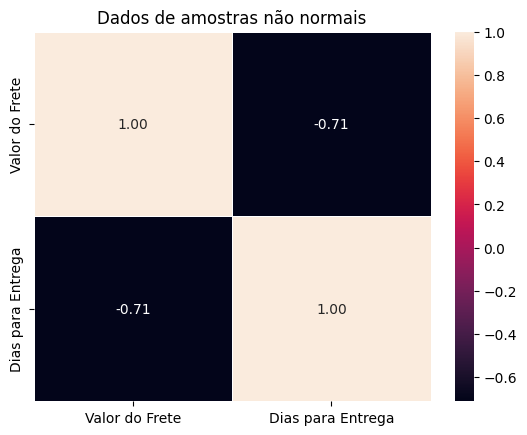

In [166]:
def correlacao(df):
  shap = False; #Variável que indica se o teste shapiro Wilk foi bem sucedido
  kolgo = False; #Variavel que indica se o teste Kolgomorov-Smirnov foi bem sucedido
  valid = 'None' #Texto que indicará qual teste foi bem sucedido
  dfNormal = pd.DataFrame() #dataFrame que indica todos os atributos normais
  dfTotal = pd.DataFrame() #dataFrame que indica todos os atributos

  shape = dadosTratados.shape
  qtdColunas = shape[1] #Indicando a quantidade de colunas do vetor

  for x in range(0, qtdColunas):
    if(is_numeric_dtype(df.iloc[:,x])):
      vetor = df.iloc[:,x].values

      statistic, pValue = shapiro(vetor) #Realizando o teste Shapiro-Wilk
      if(pValue > 0.05):
        shap = True
        valid = 'Shapiro-Wilk'
      else:
        shap = False

      statistic, pValue = kstest(vetor, 'norm') #Realizando o teste Kolgomorov Smirnov
      if(pValue > 0.05):
        kolgo = True
        valid = 'Kolgomorov-Smirnov'
      else:
        kolgo = False

      if(shap or kolgo):
        dfNormal[df.columns[x]] = pd.Series(vetor) #Se a amostra for normal ela também fica aqui

      dfTotal[df.columns[x]] = pd.Series(vetor) #Todos as amostras ficam aqui

  #Imprimindo Gráfico das amostras normais
  shape = dfNormal.shape
  qtdColunas = shape[1] #Indicando a quantidade de colunas do vetor
  if(qtdColunas > 0):
    correlacao = dfNormal.corr(method='pearson')
    ax = plt2.axes()
    sns.heatmap(correlacao, annot=True, fmt=".2f", linewidths=.5, ax = ax)
    ax.set_title("Dados de amostras não normais")
    plt2.show()

    #Imprimindo Gráfico das amostras normais
  shape = dfTotal.shape
  qtdColunas = shape[1] #Indicando a quantidade de colunas do vetor
  if(qtdColunas > 0):
    correlacao = dfTotal.corr(method='kendall')
    ax = plt2.axes()
    sns.heatmap(correlacao, annot=True, fmt=".2f", linewidths=.5, ax = ax)
    ax.set_title("Dados de amostras não normais")
    plt2.show()


correlacao(dadosTratados)

## Verificando as Amostras em Histogramas a Partir de uma função

In [118]:
def histograma(df):

  shape = dadosTratados.shape
  qtdColunas = shape[1] #Indicando a quantidade de colunas do vetor
  numeroGrupos = int(shape[0]**0.5)

  for coluna in range(0, qtdColunas):
    titulo = "Distribuição do " + df.columns[coluna]
    grafico = px.histogram(df, x=df.columns[coluna], width=600, nbins=numeroGrupos, text_auto=True, title=titulo)
    grafico.show()

histograma(dadosTratados)

#Tratamento de Dados


##Criando as Variáveis


In [119]:
#Variáveis dependentes - Será aquela variável que queremos predizer
numDias = dadosTratados.iloc[:,1].values

#Variáveis independentes - Será aquela que estará utilizada para apoiar a predição
valorFrete = dadosTratados.iloc[:,0].values

##Criando o Gráfico da Função de Regressão *Linear*

In [151]:
def graficoRegressaoLinear(varDep, varIndep):

  #Como o a regressão linear precisa ter como entrada um vetor (variavel dependente) 0e uma matriz de uma unica coluna e varias linhas (variavel independente)
  #Eu preciso converter a variável independente de array para este formato matriz, para isso usamos a função reshape
  varIndepMatriz = varIndep.reshape(-1,1)

  #Verificando se a nova variável é uma Matriz
  varIndepMatriz.shape

  #Criando a Regressão Linear
  predicaoCustoFrete = LinearRegression()

  #Treinando o Modelo de Regressão Linear
  predicaoCustoFrete.fit(varIndepMatriz, varDep)

  #Considerando que a fórmula da regressão liner é: valorVarDependente = Constante + Coeficiente*valorVarIndepente + Erro
  #Vamos encontrar os valores da equação

  #Constante
  constante = predicaoCustoFrete.intercept_   #Intercept vem de onde a reta da regressão linear intercepta o eixo y (valor da constante)

  #Coeficiente - representa o ângulo de inclinação da reta
  coeficiente = predicaoCustoFrete.coef_

  #Criando a variável com os valores da predição
  previsaoValores = predicaoCustoFrete.predict(varIndepMatriz) #Passando a variável independente em formato de Matriz

  #Vizualizando Graficamente
  grafico = px.scatter(x = varIndep, y = varDep)   #Destaco que aqui eu usei a variável independente em forma de vetor (numDias) e não em matriz (numDiasMatriz), plotando os pontos na tela
  grafico.add_scatter(x = varIndep, y = previsaoValores, name="Previsão") #Plotando a linha do gráfico
  grafico.show()


graficoRegressaoLinear(numDias, valorFrete)

## Criando o modelo de Previsão Baseado em Regressão Linear

In [150]:
def previsaoRegressaoLinear(varDep, varIndep, valorGasto):

  #Como o a regressão linear precisa ter como entrada um vetor (variavel dependente) 0e uma matriz de uma unica coluna e varias linhas (variavel independente)
  #Eu preciso converter a variável independente de array para este formato matriz, para isso usamos a função reshape
  varIndepMatriz = varIndep.reshape(-1,1)

  #Criando a Regressão Linear
  predicaoCustoFrete = LinearRegression()

  #Treinando o Modelo de Regressão Linear
  predicaoCustoFrete.fit(varIndepMatriz, varDep)

  print(predicaoCustoFrete.predict([[valorGasto]]))

#Vamos usar o modelo de predição para testar com valores de dias indicados no parâmetro
valorFretePrevisto = 100  #Variável que indica quantos dias durará a entrega
previsaoRegressaoLinear(numDias, valorFrete, valorFretePrevisto)

[5.20598782]


## Função para testar os valores pela equação

In [152]:
def funcaoRegressaoLinear(varDep, varIndep, valorGasto):

  #Como o a regressão linear precisa ter como entrada um vetor (variavel dependente) 0e uma matriz de uma unica coluna e varias linhas (variavel independente)
  #Eu preciso converter a variável independente de array para este formato matriz, para isso usamos a função reshape
  varIndepMatriz = varIndep.reshape(-1,1)

  #Criando a Regressão Linear
  predicaoCustoFrete = LinearRegression()

  #Treinando o Modelo de Regressão Linear
  predicaoCustoFrete.fit(varIndepMatriz, varDep)

  #  y(i) = alfa + beta*x(i) + erro
  alfa = predicaoCustoFrete.intercept_
  beta = predicaoCustoFrete.coef_
  Xi = valorGasto     # dias para a entrega do frete

  print (alfa + beta*Xi)   #Calculo do valor

funcaoRegressaoLinear(numDias, valorFrete, valorFretePrevisto)

[5.20598782]


##Avaliando o Modelo

In [156]:
def testeModeloRegressaoLinear(varDep, varIndep):

  #Como o a regressão linear precisa ter como entrada um vetor (variavel dependente) 0e uma matriz de uma unica coluna e varias linhas (variavel independente)
  #Eu preciso converter a variável independente de array para este formato matriz, para isso usamos a função reshape
  varIndepMatriz = varIndep.reshape(-1,1)

  #Verificando se a nova variável é uma Matriz
  varIndepMatriz.shape

  #Criando a Regressão Linear
  predicaoCustoFrete = LinearRegression()

  #Treinando o Modelo de Regressão Linear
  predicaoCustoFrete.fit(varIndepMatriz, varDep)

  #Criando a variável com os valores da predição
  previsaoValores = predicaoCustoFrete.predict(varIndepMatriz) #Passando a variável independente em formato de Matriz


  #Avaliação Simples
  score = predicaoCustoFrete.score(varIndepMatriz,varDep)   #O quanto o modelo é confiável
  print("O Score do modelo é: " + str(score))

  #Calculando pelo Mean Absolut Error
  erroMedioAbsoluto = mean_absolute_error(varIndep, previsaoValores)     #Calcula a distância entre os dados reais (valores do frete) e da previsão do modelo, quanto mais proximo de 0 melhor
  print("O erro médio abosluto do modelo é: " + str(erroMedioAbsoluto))

  #Calculando pelo Mean Squared Error
  erroMedioQuadrado = mean_squared_error(varIndep, previsaoValores)     #Calcula a distância entre os dados reais (valores do frete) e da previsão do modelo, quanto mais proximo de 0 melhor
  print("O erro médio quadrado do modelo é: " + str(erroMedioQuadrado))

  #Calculando pelo Root Mean Squared Error
  erroMedioRaiz = np.sqrt(mean_squared_error(varIndep, previsaoValores))    #Calcula a distância entre os dados reais (0valores do frete) e da previsão do modelo, quanto mais proximo de 0 melhor
  print("A raiz do erro médio quadrado do modelo é: " + str(erroMedioRaiz))


testeModeloRegressaoLinear(numDias, valorFrete)


O Score do modelo é: 0.8111671052762233
O erro médio abosluto do modelo é: 79.15486263998964
O erro médio quadrado do modelo é: 7020.535519141478
A raiz do erro médio quadrado do modelo é: 83.78863597852323
